<a href="https://colab.research.google.com/github/Begizew2112/bearing/blob/main/thesis%20cnn%2B%20lstm%20progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#connect with google drive to load the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# import all necessary libraries to the preprocessing and **modeling**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#load the data and change the working processing to T4 GPU
import tensorflow as tf
#load the data in to the workin area
with tf.device('/GPU:0'):
#load the 500000 data
    df = pd.read_csv('/content/drive/MyDrive/reduced10*6.csv',index_col= 0)

In [ ]:

# #reduce the data size for sampling
# # Check the length
# original_len = len(df500000)
# target_len = 200_000

# # Downsample by selecting every N-th row
# step = original_len // target_len
# df_downsampled = df500000.iloc[::step]

# # If it overshoots, trim to exactly 200,000 rows
# df= df_downsampled.head(target_len)


In [ ]:
# check the sample input data
df.head()

,x_direction,y_direction,bearing_temperature,env_temperature
0,-0.117601,-0.378231,41.614912,24.817354
240,0.088048,0.989880,41.614912,24.817354
480,-0.221734,-0.438032,41.614912,24.817354
720,0.205140,0.757906,41.614912,24.817354
960,0.248569,-0.207627,41.614912,24.817354


In [ ]:
#check the size of the data
df.shape

(1000000, 4)

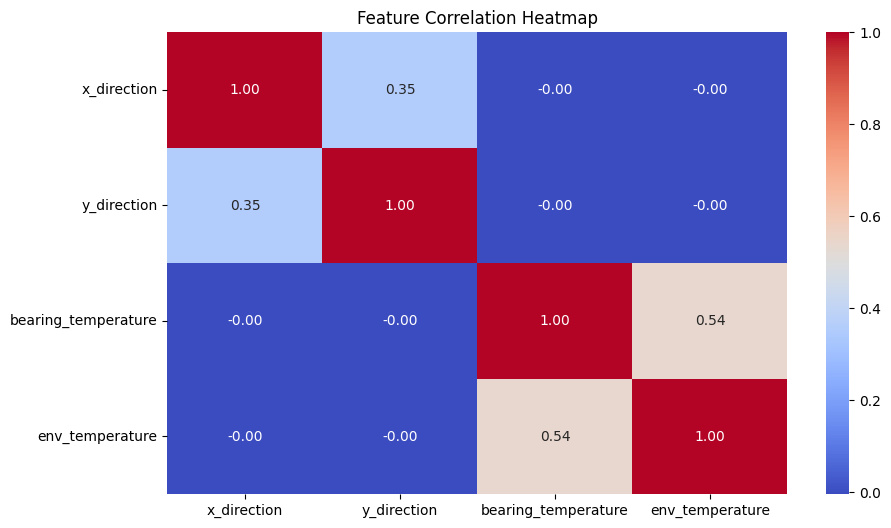

In [ ]:
#view and interprate the correlation analysis of the given columns
# Heatmap of feature correlations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [4]:
df1 = df.copy()

In [5]:

total_rows = len(df1)

In [7]:

total_rows

1000000

In [6]:
# Compute elapsed hours
df1['elapsed_hours'] = (np.arange(total_rows) / total_rows) * 128

In [7]:
# Compute RUL , the total life fo the bearing is 128 hour
df1['RUL'] = 128 - df1['elapsed_hours']

In [8]:
df2= df1.copy()

In [11]:
# view the sample data of the first and the last four rows
print(df2.head())
print(df2.tail())

     x_direction  y_direction  bearing_temperature  env_temperature  \
0      -0.117601    -0.378231            41.614912        24.817354   
240     0.088048     0.989880            41.614912        24.817354   
480    -0.221734    -0.438032            41.614912        24.817354   
720     0.205140     0.757906            41.614912        24.817354   
960     0.248569    -0.207627            41.614912        24.817354   

     elapsed_hours         RUL  
0         0.000000  128.000000  
240       0.000128  127.999872  
480       0.000256  127.999744  
720       0.000384  127.999616  
960       0.000512  127.999488  
           x_direction  y_direction  bearing_temperature  env_temperature  \
239998800     0.179271    -0.424473            56.654286        26.404714   
239999040    -0.070367     0.373286            56.654286        26.404714   
239999280     0.139080     0.485448            56.654286        26.404714   
239999520     0.606115     0.562400            56.654286        26.

In [9]:
#check if there is any empty value in the data and fill with appropriate filling method
df2.isnull().sum()

,0
x_direction,31
y_direction,31
bearing_temperature,40
env_temperature,40
elapsed_hours,0
RUL,0


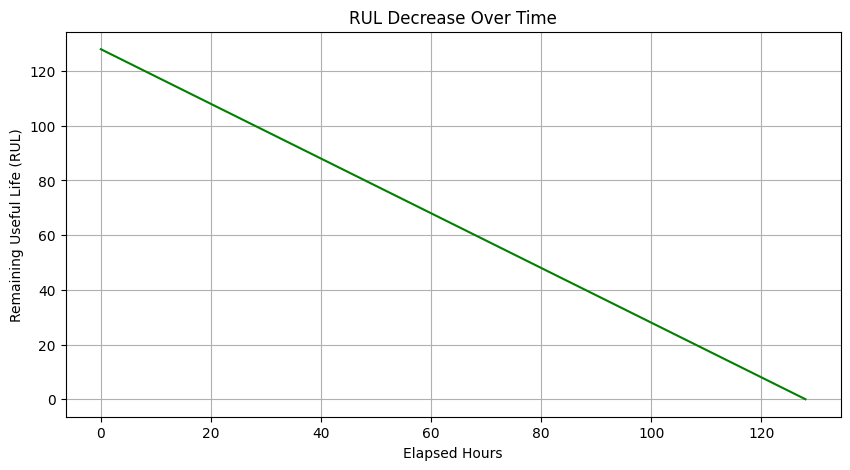

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df2['elapsed_hours'], df2['RUL'], color='green')
plt.xlabel('Elapsed Hours')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title('RUL Decrease Over Time')
plt.grid(True)
plt.show()

In [ ]:
df2.head()

,x_direction,y_direction,bearing_temperature,env_temperature,elapsed_hours,RUL
0,-0.117601,-0.378231,41.614912,24.817354,0.000000,128.000000
240,0.088048,0.989880,41.614912,24.817354,0.000128,127.999872
480,-0.221734,-0.438032,41.614912,24.817354,0.000256,127.999744
720,0.205140,0.757906,41.614912,24.817354,0.000384,127.999616
960,0.248569,-0.207627,41.614912,24.817354,0.000512,127.999488


# This code generates a line plot to visualize how the sensor readings for both 'x_direction' and 'y_direction' change over time

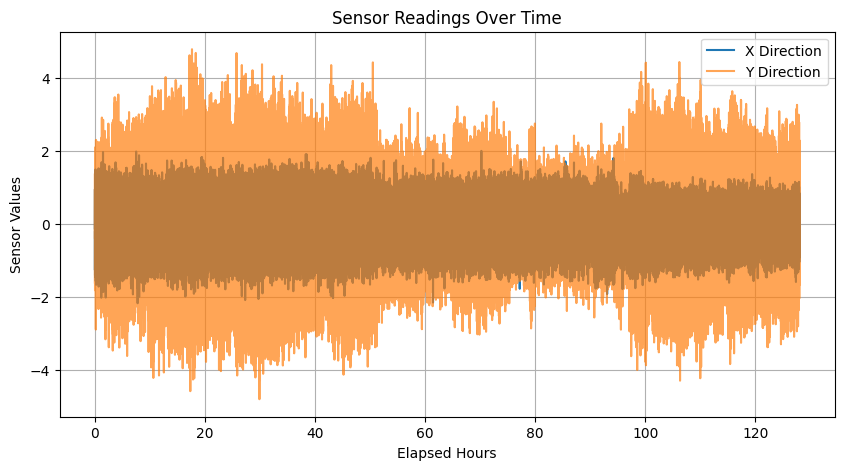

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df2['elapsed_hours'], df2['x_direction'], label='X Direction')
plt.plot(df2['elapsed_hours'], df2['y_direction'], label='Y Direction', alpha=0.7)
plt.xlabel('Elapsed Hours')
plt.ylabel('Sensor Values')
plt.title('Sensor Readings Over Time')
plt.legend()
plt.grid(True)
plt.show()

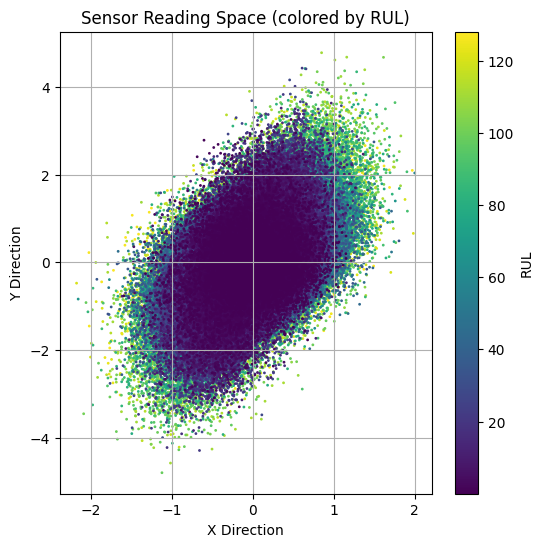

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(df2['x_direction'], df2['y_direction'], c=df2['RUL'], cmap='viridis', s=1)
plt.xlabel('X Direction')
plt.ylabel('Y Direction')
plt.title('Sensor Reading Space (colored by RUL)')
plt.colorbar(label='RUL')
plt.grid(True)
plt.show()

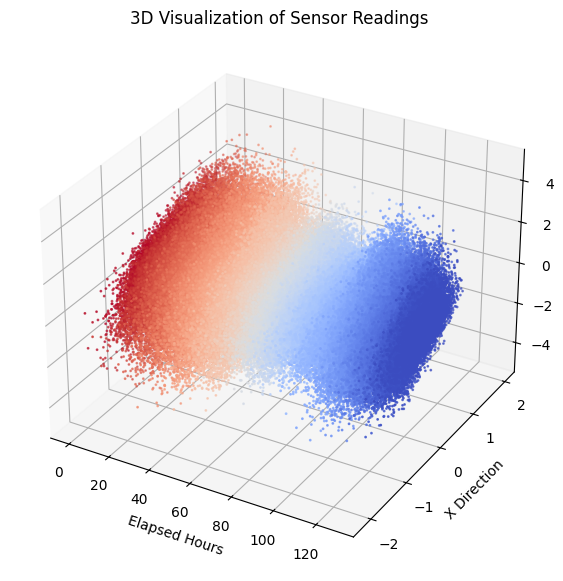

In [ ]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['elapsed_hours'], df2['x_direction'], df2['y_direction'], c=df2['RUL'], cmap='coolwarm', s=1)
ax.set_xlabel('Elapsed Hours')
ax.set_ylabel('X Direction')
ax.set_zlabel('Y Direction')
ax.set_title('3D Visualization of Sensor Readings')
plt.show()


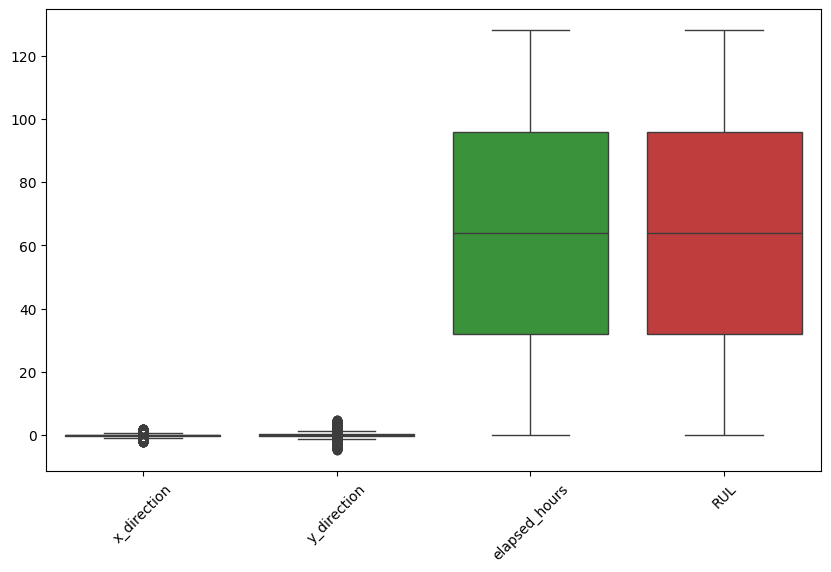

In [ ]:

# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2[["x_direction", "y_direction", "elapsed_hours", "RUL"]])
plt.xticks(rotation=45)
plt.show()

In [10]:
df2.shape

(1000000, 6)

In [11]:
df.columns

Index(['x_direction', 'y_direction', 'bearing_temperature', 'env_temperature'], dtype='object')

In [12]:
df3 = df2.drop(['bearing_temperature','env_temperature'],axis = True)  #drop the bearing temperature and environmental temperature

In [ ]:
df3.head()

,x_direction,y_direction,elapsed_hours,RUL
0,-0.117601,-0.378231,0.000000,128.000000
240,0.088048,0.989880,0.000128,127.999872
480,-0.221734,-0.438032,0.000256,127.999744
720,0.205140,0.757906,0.000384,127.999616
960,0.248569,-0.207627,0.000512,127.999488


In [ ]:
df3.shape

(1000000, 4)

# This code cleans the dataset by removing outliers to ensure higher-quality data for training the machine learning model. It first calculates the first quartile (Q1) and third quartile (Q3) for each feature in df2, then computes the interquartile range (IQR) as the difference between Q3 and Q1. Using the IQR method, it defines lower and upper bounds to detect outliers. Any data points lying below the lower bound or above the upper bound are considered outliers.

In [13]:

#clean the outlier to get the most useable data for the the traing of the model
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3 - Q1

# Define lower & upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out outliers
df4 = df3[~((df3 < lower_bound) | (df3 > upper_bound)).any(axis=1)]

In [14]:
df4.shape

(940955, 4)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


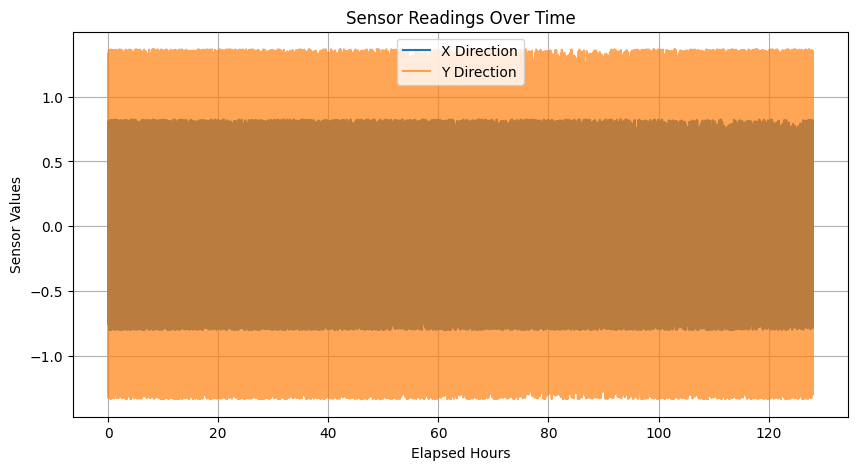

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df4['elapsed_hours'], df4['x_direction'], label='X Direction')
plt.plot(df4['elapsed_hours'], df4['y_direction'], label='Y Direction', alpha=0.7)
plt.xlabel('Elapsed Hours')
plt.ylabel('Sensor Values')
plt.title('Sensor Readings Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df4.shape

(940955, 4)

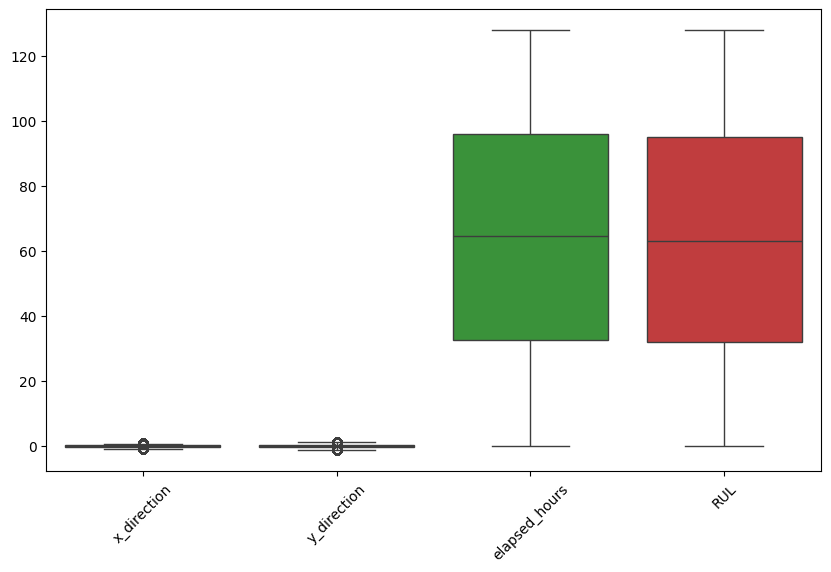

In [ ]:
# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df4[["x_direction", "y_direction", "elapsed_hours", "RUL"]])
plt.xticks(rotation=45)
plt.show()

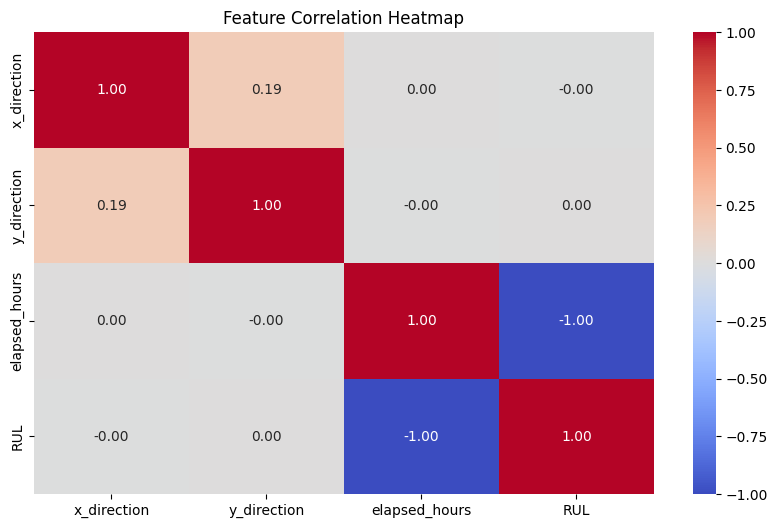

In [ ]:
# Heatmap of feature correlations
plt.figure(figsize=(10,6))
sns.heatmap(df4.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


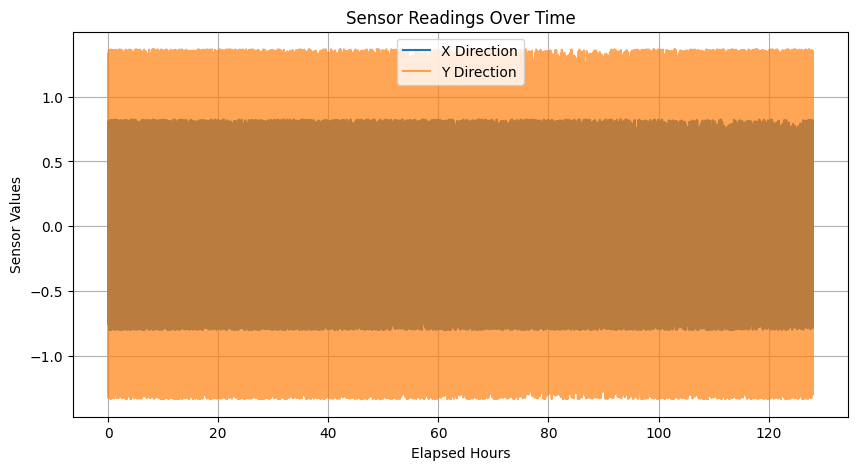

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df4['elapsed_hours'], df4['x_direction'], label='X Direction')
plt.plot(df4['elapsed_hours'], df4['y_direction'], label='Y Direction', alpha=0.7)
plt.xlabel('Elapsed Hours')
plt.ylabel('Sensor Values')
plt.title('Sensor Readings Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df4.shape

(940955, 4)

In [15]:
df5 =df4.copy()

In [16]:
# Rolling mean
df5["rolling_mean_x"] = df5["x_direction"].rolling(window=5).mean()
df5["rolling_mean_y"] = df5["y_direction"].rolling(window=5).mean()

# Exponential weighted moving average
df5["ewma_x"] = df5["x_direction"].ewm(span=5).mean()
df5["ewma_y"] = df5["y_direction"].ewm(span=5).mean()

# Difference between consecutive time steps
df5["delta_x"] = df5["x_direction"].diff()
df5["delta_y"] = df5["y_direction"].diff()

# normalization of the given data for better accuracy between 0 and 1

In [17]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Select only numerical columns
cols_to_scale = ["x_direction", "y_direction", 'RUL',"elapsed_hours", "rolling_mean_x", "rolling_mean_y", "ewma_x", "ewma_y", "delta_x", "delta_y"]
df5[cols_to_scale] = scaler.fit_transform(df5[cols_to_scale])

In [19]:
df5.head()

,x_direction,y_direction,elapsed_hours,RUL,rolling_mean_x,rolling_mean_y,ewma_x,ewma_y,delta_x,delta_y
0,0.419627,0.353456,0.000000,1.000000,NaN,NaN,0.381449,0.299343,NaN,NaN
240,0.546543,0.861155,0.000001,0.999999,NaN,NaN,0.498015,0.725962,0.563861,0.764038
480,0.355361,0.331265,0.000002,0.999998,NaN,NaN,0.396201,0.509157,0.403341,0.234381
720,0.618806,0.775070,0.000003,0.999997,NaN,NaN,0.516722,0.667276,0.632757,0.731423
960,0.645608,0.416766,0.000004,0.999996,0.557849,0.569298,0.597587,0.560069,0.513341,0.321971


In [20]:
df5.isnull().sum()

,0
x_direction,31
y_direction,31
elapsed_hours,0
RUL,0
rolling_mean_x,159
rolling_mean_y,159
ewma_x,0
ewma_y,0
delta_x,63
delta_y,63


In [21]:
df6 = df5.dropna()

In [24]:
df6.isnull().sum()

,0
x_direction,0
y_direction,0
elapsed_hours,0
RUL,0
rolling_mean_x,0
rolling_mean_y,0
ewma_x,0
ewma_y,0
delta_x,0
delta_y,0


In [22]:
df6.head()

,x_direction,y_direction,elapsed_hours,RUL,rolling_mean_x,rolling_mean_y,ewma_x,ewma_y,delta_x,delta_y
960,0.645608,0.416766,0.000004,0.999996,0.557849,0.569298,0.597587,0.560069,0.513341,0.321971
1200,0.958307,0.606293,0.000005,0.999995,0.714495,0.638436,0.819922,0.594189,0.657612,0.601621
1440,0.309600,0.575660,0.000006,0.999994,0.645593,0.560368,0.605047,0.599977,0.172462,0.489236
1680,0.528346,0.605061,0.000007,0.999993,0.695896,0.635237,0.585215,0.617924,0.610201,0.519882
1920,0.378272,0.424681,0.000008,0.999992,0.625950,0.539424,0.493814,0.543032,0.424085,0.412795


In [23]:
import numpy as np
from scipy.fftpack import fft

def compute_fft_features(seq):
    """Compute FFT features from x and y direction signals in a sequence"""
    fft_x = np.abs(fft(seq[:, 0]))[:10]  # x_direction, first 10 FFT components
    fft_y = np.abs(fft(seq[:, 1]))[:10]  # y_direction
    return np.concatenate([fft_x, fft_y])  # shape: (20,)


In [25]:
# def create_sequences_fast(data, seq_length):
#     data = data.to_numpy()  # Convert DataFrame to NumPy once!
#     X, y = [], []
#     for i in range(len(data) - seq_length):
#         X.append(data[i:i+seq_length, :-1])  # Features
#         y.append(data[i+seq_length, -1])    # Target (RUL)
#     return np.array(X), np.array(y)

# # Create sequences with a length of 50 (can adjust)
# seq_length = 50
# X, y = create_sequences_fast(df6, seq_length)


In [24]:
def create_sequences_with_fft(data, seq_length):
    data = data.to_numpy()
    X_seq, fft_feats, y = [], [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length, :-1]  # All features except RUL
        target = data[i+seq_length, -1]  # RUL at prediction point

        fft_feat = compute_fft_features(seq)  # shape: (20,)

        X_seq.append(seq)
        fft_feats.append(fft_feat)
        y.append(target)

    return np.array(X_seq), np.array(fft_feats), np.array(y)


In [25]:
seq_length = 50
X_seq, fft_features, y = create_sequences_with_fft(df6, seq_length)

print("X_seq shape:", X_seq.shape)             # (samples, 50, 9)
print("FFT features shape:", fft_features.shape)  # (samples, 20)
print("y shape:", y.shape)


X_seq shape: (940746, 50, 9)
FFT features shape: (940746, 20)
y shape: (940746,)


In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization, Concatenate
from tensorflow.keras.optimizers import Adam

# Sequence input (for LSTM)
seq_input = Input(shape=(X_seq.shape[1], X_seq.shape[2]))  # e.g., (50, 9)
x = LSTM(64, return_sequences=True)(seq_input)
x = Dropout(0.2)(x)
x = LSTM(32)(x)
x = BatchNormalization()(x)

# FFT input (global frequency features)
fft_input = Input(shape=(fft_features.shape[1],))  # e.g., (20,)
combined = Concatenate()([x, fft_input])

# Final regression output
output = Dense(1, activation='linear')(combined)

# Define the full model
model = Model(inputs=[seq_input, fft_input], outputs=output)

# Compile
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mae', metrics=['mae'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 50, 9)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 50, 64)    │     18,944 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 50, 64)    │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 32)        │     12,416 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 32)        │        128 │ lstm_1[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 20)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 52)        │          0 │ batch_normalizat… │
│ (Concatenate)       │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1)         │         53 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 31,541 (123.21 KB)

 Trainable params: 31,477 (122.96 KB)

 Non-trainable params: 64 (256.00 B)

In [27]:
split_index = int(0.8 * len(X_seq))

X_train_seq = X_seq[:split_index]
X_test_seq = X_seq[split_index:]

fft_train = fft_features[:split_index]
fft_test = fft_features[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]


In [29]:
X_train_seq.shape

(752596, 50, 9)

In [31]:
X_test_seq.shape

(188150, 50, 9)

In [32]:
fft_train.shape

(752596, 20)

In [33]:
y_train.shape

(752596,)

In [34]:
model.fit(
    [X_train_seq, fft_train],  # Input: sequence and FFT features
    y_train,                   # Target: RUL
    epochs=50,
    batch_size=32,
    validation_split=0.1       # 10% of training data will be used for validation during training
)


Epoch 1/50
21167/21167 ━━━━━━━━━━━━━━━━━━━━ 207s 10ms/step - loss: 0.4867 - mae: 0.4867 - val_loss: 0.0851 - val_mae: 0.0851
Epoch 2/50
21167/21167 ━━━━━━━━━━━━━━━━━━━━ 260s 10ms/step - loss: 0.1022 - mae: 0.1022 - val_loss: 0.0716 - val_mae: 0.0716
Epoch 3/50
21167/21167 ━━━━━━━━━━━━━━━━━━━━ 262s 10ms/step - loss: 0.0936 - mae: 0.0936 - val_loss: 0.1206 - val_mae: 0.1206
Epoch 4/50
21167/21167 ━━━━━━━━━━━━━━━━━━━━ 203s 10ms/step - loss: 0.0870 - mae: 0.0870 - val_loss: 0.0768 - val_mae: 0.0768
Epoch 5/50
21167/21167 ━━━━━━━━━━━━━━━━━━━━ 261s 10ms/step - loss: 0.0812 - mae: 0.0812 - val_loss: 0.0721 - val_mae: 0.0721
Epoch 6/50
21167/21167 ━━━━━━━━━━━━━━━━━━━━ 263s 10ms/step - loss: 0.0773 - mae: 0.0773 - val_loss: 0.1132 - val_mae: 0.1132
Epoch 7/50
21167/21167 ━━━━━━━━━━━━━━━━━━━━ 266s 10ms/step - loss: 0.0745 - mae: 0.0745 - val_loss: 0.0898 - val_mae: 0.0898
Epoch 8/50
21167/21167 ━━━━━━━━━━━━━━━━━━━━ 258s 10ms/step - loss: 0.0732 - mae: 0.0732 - val_loss: 0.0740 - val_mae: 0.0740


In [35]:
model.evaluate([X_test_seq, fft_test], y_test)


5880/5880 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - loss: 0.0810 - mae: 0.0810


[0.0811714306473732, 0.0811714306473732]

In [36]:
y_pred = model.predict([X_test_seq, fft_test])


5880/5880 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step


In [37]:
# Evaluate performance on test data
test_loss, test_mae = model.evaluate([X_test_seq, fft_test], y_test)
print(f"\nTest MAE (Mean Absolute Error): {test_mae:.4f}")



5880/5880 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - loss: 0.0810 - mae: 0.0810

Test MAE (Mean Absolute Error): 0.0812


5880/5880 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step


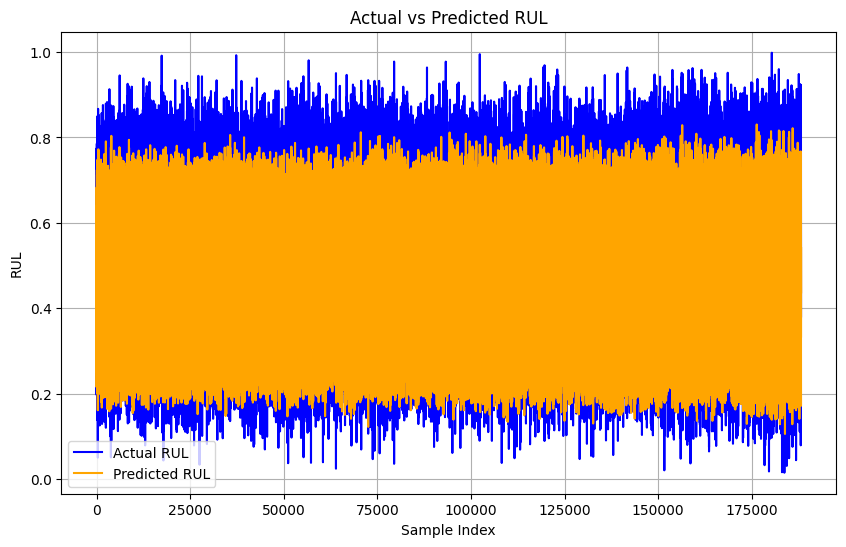

In [38]:
import matplotlib.pyplot as plt

# Predict RUL on test data
y_pred = model.predict([X_test_seq, fft_test]).flatten()

# Plot actual vs predicted RUL
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual RUL', color='blue')
plt.plot(y_pred, label='Predicted RUL', color='orange')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.title('Actual vs Predicted RUL')
plt.legend()
plt.grid(True)
plt.show()


5880/5880 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step


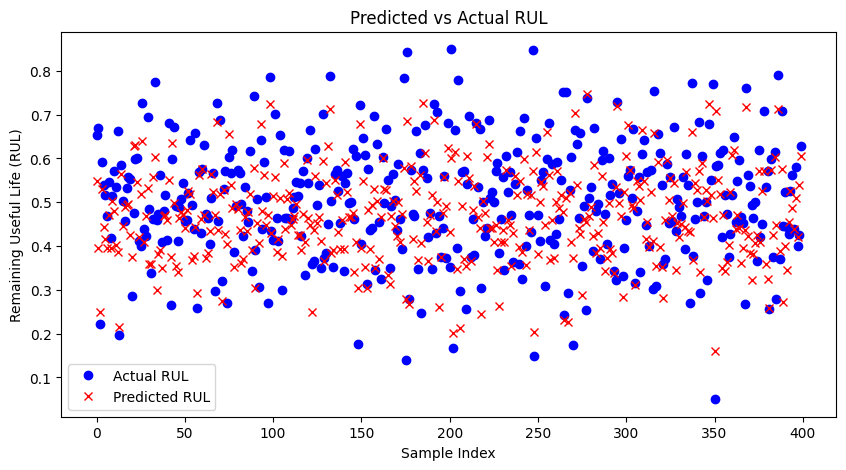

In [40]:
# Predict RUL on test data
y_pred = model.predict([X_test_seq, fft_test]).flatten()

# Plot actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(y_test[:400], "bo", label="Actual RUL")  # Blue dots
plt.plot(y_pred[:400], "rx", label="Predicted RUL")  # Red crosses
plt.xlabel("Sample Index")
plt.ylabel("Remaining Useful Life (RUL)")
plt.legend()
plt.title("Predicted vs Actual RUL")
plt.show()

In [39]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")


R² Score: 0.4171


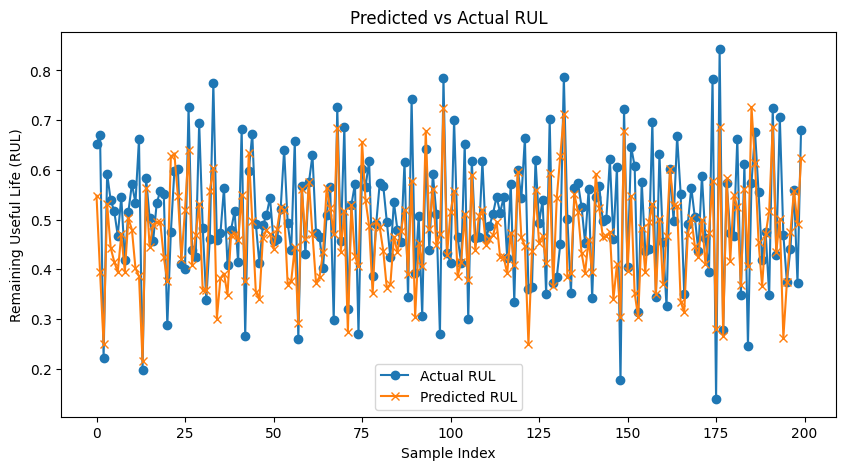

In [41]:
plt.figure(figsize=(10,5))
plt.plot(y_test[:200], label="Actual RUL", marker='o')  # First 100 points
plt.plot(y_pred[:200], label="Predicted RUL", marker='x')
plt.xlabel("Sample Index")
plt.ylabel("Remaining Useful Life (RUL)")
plt.title("Predicted vs Actual RUL")
plt.legend()
plt.show()

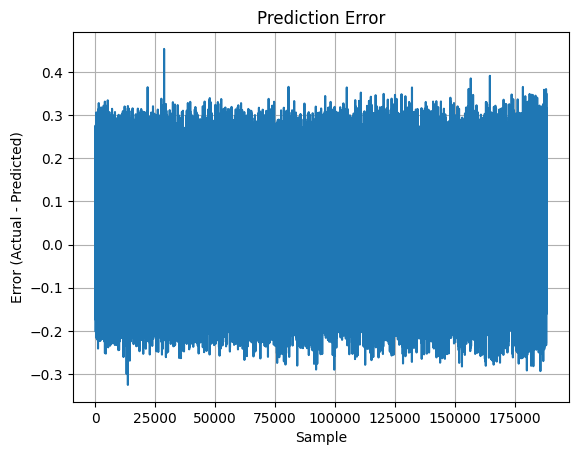

In [42]:
error = y_test - y_pred
plt.plot(error)
plt.title("Prediction Error")
plt.xlabel("Sample")
plt.ylabel("Error (Actual - Predicted)")
plt.grid(True)
plt.show()
